In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn import datasets
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
#檢查是否有缺數據
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
len(df.columns)

13

<AxesSubplot:ylabel='DEATH_EVENT'>

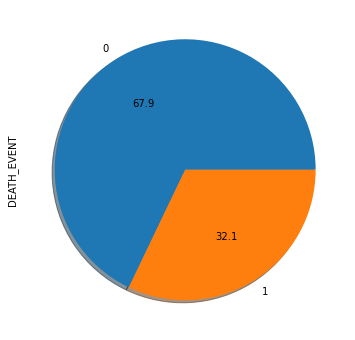

In [7]:
plt.figure(figsize=(6,6))
df['DEATH_EVENT'].value_counts().plot(kind='pie', autopct='%1.1f', shadow=True)

In [8]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:>

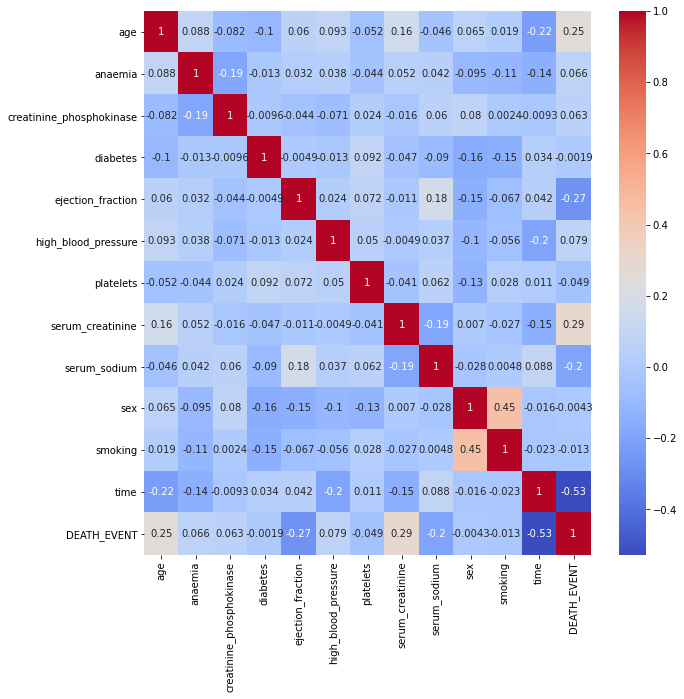

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

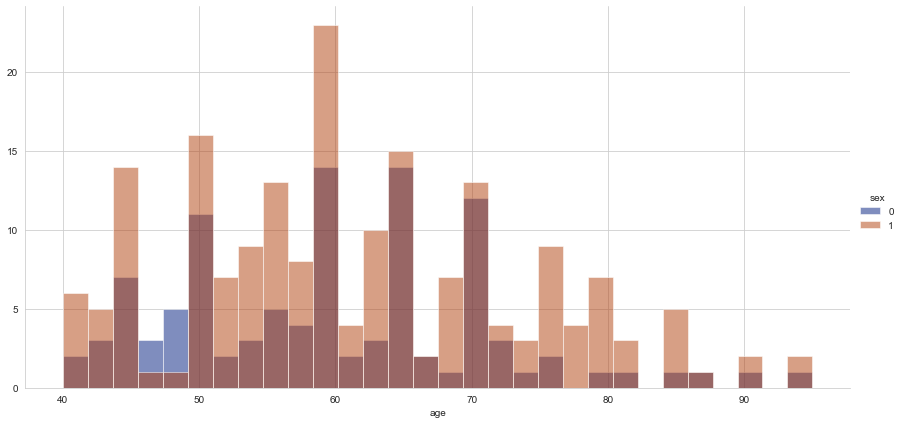

In [10]:
sns.set_style('whitegrid')

g = sns.FacetGrid(df, hue="sex", height=6, aspect=2, palette='dark')
g = g.map(plt.hist, "age", bins=30, alpha=0.5)

g.add_legend()

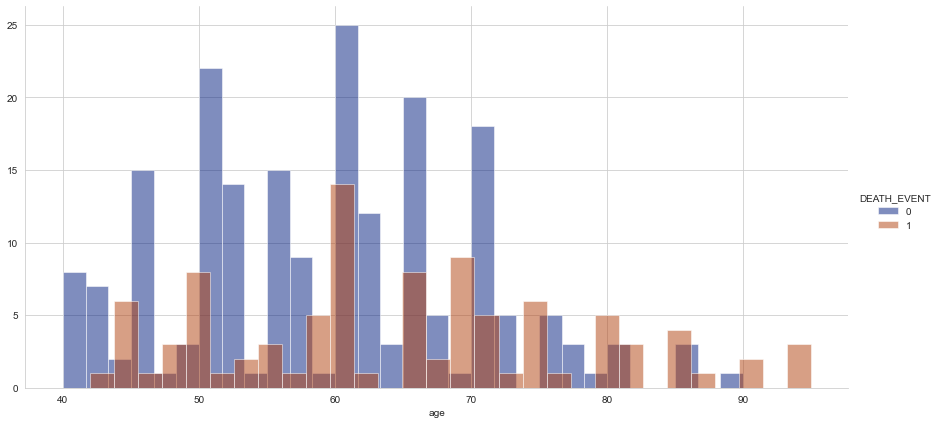

In [11]:
g = sns.FacetGrid(df, hue="DEATH_EVENT", height=6, aspect=2, palette='dark')
g = g.map(plt.hist, "age", bins=30, alpha=0.5)

g.add_legend()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

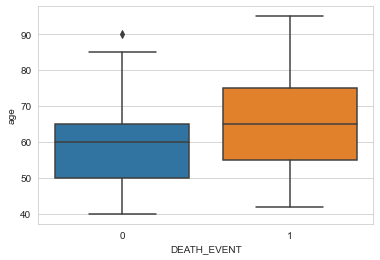

In [12]:
sns.boxplot(x="DEATH_EVENT", y="age", data=df)

In [13]:
X=df.drop(['DEATH_EVENT'], axis=1)
y=df['DEATH_EVENT']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))

In [16]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [17]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [18]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
p1=lr.predict(X_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", s1*100,'%')

Linear Regression Success Rate : 73.33333333333333 %


In [19]:
print_validation_report(y_test,p1)

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        37
           1       0.82      0.39      0.53        23

    accuracy                           0.73        60
   macro avg       0.77      0.67      0.67        60
weighted avg       0.75      0.73      0.70        60

Accuracy : 0.7333333333333333


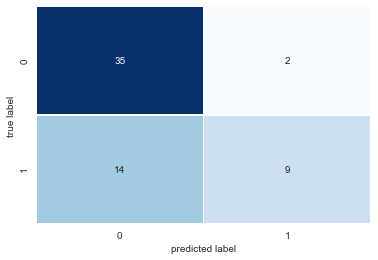

In [20]:
plot_confusion_matrix(y_test,p1)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
p2=rfc.predict(X_test)
s2=accuracy_score(y_test,p2)
print("Random Forrest Accuracy :", s2*100,'%')

Random Forrest Accuracy : 83.33333333333334 %


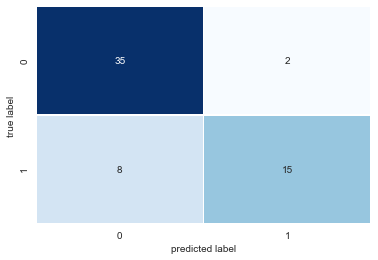

In [22]:
plot_confusion_matrix(y_test,p2)

In [23]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
p3=svm.predict(X_test)
s3=accuracy_score(y_test,p3)
print("SVM Accuracy :", s3*100,'%')

SVM Accuracy : 61.66666666666667 %


In [24]:
f1_score(y_test,p3)

0.0

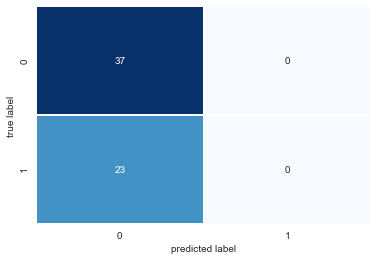

In [25]:
plot_confusion_matrix(y_test,p3)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
p4=knn.predict(X_test)
s4=accuracy_score(y_test,p4)
print("KNN Accuracy :", s4*100,'%')

KNN Accuracy : 58.333333333333336 %


In [27]:
f1_score(y_test,p4)

0.358974358974359

In [1]:
plot_confusion_matrix(y_test,p4)

NameError: name 'plot_confusion_matrix' is not defined

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
p5 =nb.predict(X_test)
s5=accuracy_score(y_test,p5)
print("Naive-Bayes Accuracy:", s5*100,'%')

Naive-Bayes Accuracy: 76.66666666666667 %


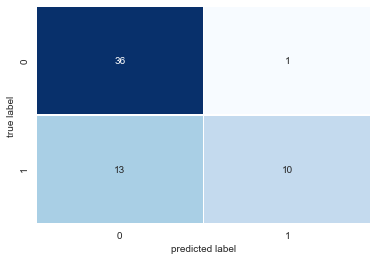

In [29]:
plot_confusion_matrix(y_test,p5)

In [30]:
f1_score(y_test,p5)

0.5882352941176471

In [31]:
f1=f1_score(y_test,p1)
f2=f1_score(y_test,p2)
f3=f1_score(y_test,p3)
f4=f1_score(y_test,p4)
f5=f1_score(y_test,p5)

In [32]:
models = pd.DataFrame({
    'Model': ["LOGISTIC REGRESSION","RANDOM FOREST","SUPPORT VECTOR MACHINE","KNN","NAIVE-BAYES"],
    'Accuracy Score': [s1*100,s2*100,s3*100,s4*100,s5*100],
    'f1_score': [f1*100,f2*100,f3*100,f4*100,f5*100]})
models.sort_values(by='Accuracy Score', ascending=False)
models.sort_values(by='f1_score', ascending=False)

,Model,Accuracy Score,f1_score
1,RANDOM FOREST,83.333333,75.000000
4,NAIVE-BAYES,76.666667,58.823529
0,LOGISTIC REGRESSION,73.333333,52.941176
3,KNN,58.333333,35.897436
2,SUPPORT VECTOR MACHINE,61.666667,0.000000


In [33]:
from sklearn.metrics import roc_curve,roc_auc_score, auc

In [34]:
fpr1,tpr1, thr1=roc_curve(y_test,p1)
fpr2,tpr2, thr2=roc_curve(y_test,p2)
fpr3,tpr3, thr3=roc_curve(y_test,p3)
fpr4,tpr4, thr4=roc_curve(y_test,p4)
fpr5,tpr5, thr5=roc_curve(y_test,p5)

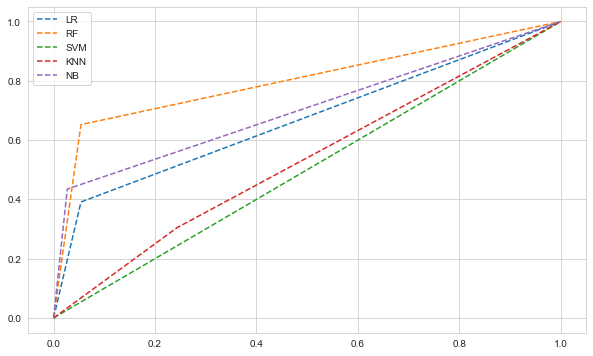

In [35]:
plt.figure(figsize=(10,6))
plt.plot(fpr1,tpr1, linestyle='--', label='LR')
plt.plot(fpr2,tpr2, linestyle='--', label='RF')
plt.plot(fpr3,tpr3, linestyle='--', label='SVM')
plt.plot(fpr4,tpr4, linestyle='--', label='KNN')
plt.plot(fpr5,tpr5, linestyle='--', label='NB')
plt.legend()

In [36]:
print(roc_auc_score(y_test,p1))
print(roc_auc_score(y_test,p2))
print(roc_auc_score(y_test,p3))
print(roc_auc_score(y_test,p4))
print(roc_auc_score(y_test,p5))

0.6686251468860165
0.799059929494712
0.5
0.5305522914218567
0.7038777908343126


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
death_tree.fit(X_train, y_train)
pred_death = death_tree.predict(X_test)

In [39]:
from sklearn import tree
import graphviz

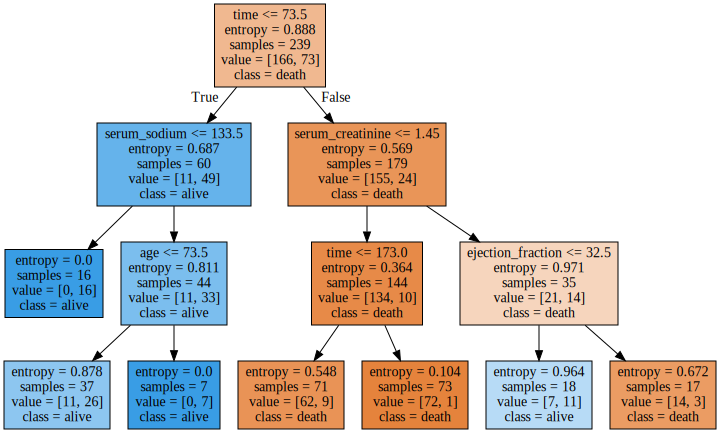

<Figure size 14400x14400 with 0 Axes>

In [40]:
plt.figure(figsize=(200, 200))
filename ='death_tree.png'

featureNames = df.columns[:-1]
targetNames = ['death', 'alive']

dot_data = tree.export_graphviz(death_tree, feature_names=featureNames, class_names=targetNames,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance


  

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)


eli5.show_weights(perm, feature_names=X_test.columns.tolist())

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.2000 ± 0.1095,time
0.0333 ± 0.0211,ejection_fraction
0.0100 ± 0.0267,serum_sodium
0.0100 ± 0.0340,serum_creatinine
0.0067 ± 0.0163,high_blood_pressure
0.0067 ± 0.0163,creatinine_phosphokinase
0.0033 ± 0.0133,platelets
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,diabetes
